In [151]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import matplotlib

In [152]:
johnson_lfq = pd.read_csv('/Users/macbook/Desktop/data/johnson_20/UPenn_Multiple_Neurodegenerative_Diseases/Discovery_LFQ_Proteomics/data/0.Traits.csv')
johnson_lfq

,MaxQuant ID,Sample ID,Batch,RunOrder,Edu,Age,Sex,PMI,Braak,CERAD,Race,Dx.Final,Include.MEGA.Clean,Include.MEGA.Mixed,Group
0,PENN.b01.02.UGIS,UGIS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN
1,PENN.b01.03.337,337,1,1.0,NaN,59,1.0,18.0,0.0,0.0,White,Control,True,True,Control
2,PENN.b01.04.72,72,1,2.0,NaN,66,1.0,23.0,1.0,0.0,White,PD/PDD,False,True,PD.PDD
3,PENN.b01.06.113,113,1,4.0,12.0,70,1.0,8.0,1.0,1.0,White,PD/PDD,False,True,PD.PDD
4,PENN.b01.05.144,144,1,3.0,18.0,71,1.0,14.0,2.0,0.0,White,Progressive supranuclear palsy,True,True,PSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,PENN.b09.39.313,313,9,35.0,NaN,63,0.0,21.0,0.0,0.0,White,Control,True,True,Control
380,PENN.b09.40.61,61,9,36.0,12.0,78,0.0,23.0,0.0,0.0,White,PD/PDD,True,True,PD.PDD
381,PENN.b09.41.212,212,9,37.0,NaN,78,0.0,4.5,1.0,3.0,White,"Lewy body disease, dementia with Lewy bodies",False,False,LBD
382,PENN.b09.42.9,9,9,38.0,NaN,75,1.0,19.0,NaN,0.0,White,Multiple system atrophy,True,True,MSA


In [153]:
johnson_lfq['Dx.Final'].unique()

array([nan, 'Control', 'PD/PDD', 'Progressive supranuclear palsy',
       'Lewy body disease, dementia with Lewy bodies',
       'Amyotrophic lateral sclerosis', "Alzheimer's disease",
       'Frontotemporal lobar degeneration with TDP inclusions (Also known as FTLD-TDP)',
       'Frontotemporal dementia with parkinsonism linked to chromosome 17',
       'Corticobasal degeneration', 'Multiple system atrophy',
       'Frontotemporal lobar degeneration with ubiquitin inclusions (Also known as FTLD-UPS)',
       'Pathological aging', 'Amyotrophic lateral sclerosis - dementia',
       'Frontotemporal lobar degeneration with FUS inclusions (Also known as FTLD-FUS)',
       'Tangle predominant senile dementia', "Pick's disease"],
      dtype=object)

In [154]:
johnson_lfq['Group'].unique()

array([nan, 'Control', 'PD.PDD', 'PSP', 'LBD', 'ALS', 'AD', 'FTLDU',
       'FTDPc17', 'CBD', 'MSA',
       'Frontotemporal lobar degeneration with ubiquitin inclusions (Also known as FTLD-UPS)',
       'Pathological aging', 'ALSFTD',
       'Frontotemporal lobar degeneration with FUS inclusions (Also known as FTLD-FUS)',
       'Tangle predominant senile dementia', "Pick's disease"],
      dtype=object)

In [155]:
print(johnson_lfq.shape)
johnson_lfq.head(3)

(384, 15)


,MaxQuant ID,Sample ID,Batch,RunOrder,Edu,Age,Sex,PMI,Braak,CERAD,Race,Dx.Final,Include.MEGA.Clean,Include.MEGA.Mixed,Group
0,PENN.b01.02.UGIS,UGIS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN
1,PENN.b01.03.337,337,1,1.0,NaN,59,1.0,18.0,0.0,0.0,White,Control,True,True,Control
2,PENN.b01.04.72,72,1,2.0,NaN,66,1.0,23.0,1.0,0.0,White,PD/PDD,False,True,PD.PDD


In [156]:
lfq_c = pd.read_excel('/Users/macbook/Desktop/data/johnson_20/UPenn_Multiple_Neurodegenerative_Diseases/Discovery_LFQ_Proteomics/data/3.cleanDat.xlsx')

In [157]:
print(lfq_c.shape)
lfq_c.head(3)

(2919, 330)


,UniqueID (Symbol|UniprotID),PENN.b01.03.337,PENN.b01.04.72,PENN.b01.05.144,PENN.b01.06.113,PENN.b01.08.6,PENN.b01.09.133,PENN.b01.10.13,PENN.b01.12.304,PENN.b01.13.137,...,PENN.b10.05.317,PENN.b10.06.273,PENN.b10.07.162,PENN.b10.08.265,PENN.b10.09.36,PENN.b10.10.296,PENN.b10.11.18,PENN.b10.12.75,PENN.b10.13.206,PENN.b10.14.237
0,PRSS1|A6XGL3,0.159208,-0.033243,-0.314536,0.058731,0.131777,-0.582602,0.018852,0.123650,-0.568575,...,-0.126824,0.247137,-0.034353,-0.642673,0.193873,0.138747,0.871421,0.362321,0.547019,-0.126203
1,HBZ|P02008,-0.034300,0.801756,-0.189474,-0.273036,-0.155604,-0.547038,-0.209162,0.517474,-0.035678,...,-0.127652,-0.055389,0.120112,0.644302,0.413205,0.013004,-0.256300,-0.025567,0.184682,-0.668106
2,ALB|P02768,-0.241531,-0.305055,0.701782,0.802219,0.632816,0.460425,0.485964,0.904737,0.448754,...,0.807949,0.138896,0.945248,1.279232,0.935185,-0.197176,0.379456,0.175288,0.573616,0.181753


In [158]:
lfq_c = lfq_c.T

In [159]:
lfq_c

,0,1,2,3,4,5,6,7,8,9,...,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918
UniqueID (Symbol|UniprotID),PRSS1|A6XGL3,HBZ|P02008,ALB|P02768,KRT10|P13645,|CON__P15636,KRT2|P35908,|CON__Q3ZBD7,UBA6|A0AVT1,ESYT2|A0FGR8-2,KIAA1598|A0MZ66-2,...,TPM4|K7EQW8,DLG3|Q92796,NPDC1|Q9NQX5,SH3BGRL3|Q9H299,SARS|P49591,HIST2H3PS2|Q5TEC6,TPM1|Q6ZN40,PSMC3|P17980,RPS10-NUDT3|S4R435,COX8A|P10176
PENN.b01.03.337,0.159208,-0.0343,-0.241531,-0.699275,-0.099439,-0.860825,0.828275,0.513214,-0.198817,0.269939,...,0.295556,0.389018,NaN,0.673632,-0.125666,-0.665902,0.305523,-0.01098,0.151262,-0.096024
PENN.b01.04.72,-0.033243,0.801756,-0.305055,0.240804,0.072863,-0.052459,0.792108,0.247748,-0.002507,0.282931,...,0.56623,0.229522,NaN,0.942511,-0.047428,0.128481,-0.067286,0.024338,0.166278,0.159954
PENN.b01.05.144,-0.314536,-0.189474,0.701782,-0.884162,-0.652764,-0.530128,NaN,0.580497,-0.262329,0.397314,...,0.970857,0.112337,-0.5879,0.481296,-0.035202,-0.126331,0.702332,0.094842,0.034467,-0.31649
PENN.b01.06.113,0.058731,-0.273036,0.802219,-0.202383,-0.318592,-0.43885,-0.16015,0.492072,-0.184001,0.460288,...,0.76963,0.012591,NaN,0.518448,-0.152779,-0.407289,0.421535,0.024041,0.255563,-0.366972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PENN.b10.10.296,0.138747,0.013004,-0.197176,-0.42654,-0.124915,-0.647205,1.902158,0.840644,0.118598,0.162496,...,0.910609,0.07411,NaN,0.377843,-0.005891,0.522387,-0.043714,0.253781,-0.253907,-0.104684
PENN.b10.11.18,0.871421,-0.2563,0.379456,0.689552,1.320315,0.53546,1.634647,0.665446,-0.355095,0.314018,...,-0.237748,-0.0877,NaN,0.229847,-0.45145,0.04526,1.462586,0.037186,-0.309575,-0.107274
PENN.b10.12.75,0.362321,-0.025567,0.175288,0.194095,-1.269352,1.215207,-1.697741,0.065018,-0.118268,0.231549,...,NaN,0.304345,NaN,1.190175,0.226457,-1.149197,0.727213,0.631613,0.376776,0.11815
PENN.b10.13.206,0.547019,0.184682,0.573616,0.085249,-0.764857,-0.001785,2.402298,0.630308,-0.594001,0.493067,...,NaN,-0.557659,NaN,1.118957,0.052606,-0.197044,1.10113,0.66179,0.13325,-0.281726


In [160]:
# lfq_c.iloc[0]
first = lfq_c.iloc[0]
# lfq_c.drop('UniqueID (Symbol|UniprotID)', inplace=True)
first

0             PRSS1|A6XGL3
1               HBZ|P02008
2               ALB|P02768
3             KRT10|P13645
4             |CON__P15636
               ...        
2914     HIST2H3PS2|Q5TEC6
2915           TPM1|Q6ZN40
2916          PSMC3|P17980
2917    RPS10-NUDT3|S4R435
2918          COX8A|P10176
Name: UniqueID (Symbol|UniprotID), Length: 2919, dtype: object

In [161]:
lfq_c.columns = first
lfq_c.reset_index(inplace = True)
# lfq_c.rename(columns={'index': 'MaxQuant ID'}, inplace=True)
lfq_c

UniqueID (Symbol|UniprotID),index,PRSS1|A6XGL3,HBZ|P02008,ALB|P02768,KRT10|P13645,|CON__P15636,KRT2|P35908,|CON__Q3ZBD7,UBA6|A0AVT1,ESYT2|A0FGR8-2,...,TPM4|K7EQW8,DLG3|Q92796,NPDC1|Q9NQX5,SH3BGRL3|Q9H299,SARS|P49591,HIST2H3PS2|Q5TEC6,TPM1|Q6ZN40,PSMC3|P17980,RPS10-NUDT3|S4R435,COX8A|P10176
0,UniqueID (Symbol|UniprotID),PRSS1|A6XGL3,HBZ|P02008,ALB|P02768,KRT10|P13645,|CON__P15636,KRT2|P35908,|CON__Q3ZBD7,UBA6|A0AVT1,ESYT2|A0FGR8-2,...,TPM4|K7EQW8,DLG3|Q92796,NPDC1|Q9NQX5,SH3BGRL3|Q9H299,SARS|P49591,HIST2H3PS2|Q5TEC6,TPM1|Q6ZN40,PSMC3|P17980,RPS10-NUDT3|S4R435,COX8A|P10176
1,PENN.b01.03.337,0.159208,-0.0343,-0.241531,-0.699275,-0.099439,-0.860825,0.828275,0.513214,-0.198817,...,0.295556,0.389018,NaN,0.673632,-0.125666,-0.665902,0.305523,-0.01098,0.151262,-0.096024
2,PENN.b01.04.72,-0.033243,0.801756,-0.305055,0.240804,0.072863,-0.052459,0.792108,0.247748,-0.002507,...,0.56623,0.229522,NaN,0.942511,-0.047428,0.128481,-0.067286,0.024338,0.166278,0.159954
3,PENN.b01.05.144,-0.314536,-0.189474,0.701782,-0.884162,-0.652764,-0.530128,NaN,0.580497,-0.262329,...,0.970857,0.112337,-0.5879,0.481296,-0.035202,-0.126331,0.702332,0.094842,0.034467,-0.31649
4,PENN.b01.06.113,0.058731,-0.273036,0.802219,-0.202383,-0.318592,-0.43885,-0.16015,0.492072,-0.184001,...,0.76963,0.012591,NaN,0.518448,-0.152779,-0.407289,0.421535,0.024041,0.255563,-0.366972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,PENN.b10.10.296,0.138747,0.013004,-0.197176,-0.42654,-0.124915,-0.647205,1.902158,0.840644,0.118598,...,0.910609,0.07411,NaN,0.377843,-0.005891,0.522387,-0.043714,0.253781,-0.253907,-0.104684
326,PENN.b10.11.18,0.871421,-0.2563,0.379456,0.689552,1.320315,0.53546,1.634647,0.665446,-0.355095,...,-0.237748,-0.0877,NaN,0.229847,-0.45145,0.04526,1.462586,0.037186,-0.309575,-0.107274
327,PENN.b10.12.75,0.362321,-0.025567,0.175288,0.194095,-1.269352,1.215207,-1.697741,0.065018,-0.118268,...,NaN,0.304345,NaN,1.190175,0.226457,-1.149197,0.727213,0.631613,0.376776,0.11815
328,PENN.b10.13.206,0.547019,0.184682,0.573616,0.085249,-0.764857,-0.001785,2.402298,0.630308,-0.594001,...,NaN,-0.557659,NaN,1.118957,0.052606,-0.197044,1.10113,0.66179,0.13325,-0.281726


In [162]:
lfq_c.rename(columns={'index': 'MaxQuant ID'}, inplace=True)
lfq_c

UniqueID (Symbol|UniprotID),MaxQuant ID,PRSS1|A6XGL3,HBZ|P02008,ALB|P02768,KRT10|P13645,|CON__P15636,KRT2|P35908,|CON__Q3ZBD7,UBA6|A0AVT1,ESYT2|A0FGR8-2,...,TPM4|K7EQW8,DLG3|Q92796,NPDC1|Q9NQX5,SH3BGRL3|Q9H299,SARS|P49591,HIST2H3PS2|Q5TEC6,TPM1|Q6ZN40,PSMC3|P17980,RPS10-NUDT3|S4R435,COX8A|P10176
0,UniqueID (Symbol|UniprotID),PRSS1|A6XGL3,HBZ|P02008,ALB|P02768,KRT10|P13645,|CON__P15636,KRT2|P35908,|CON__Q3ZBD7,UBA6|A0AVT1,ESYT2|A0FGR8-2,...,TPM4|K7EQW8,DLG3|Q92796,NPDC1|Q9NQX5,SH3BGRL3|Q9H299,SARS|P49591,HIST2H3PS2|Q5TEC6,TPM1|Q6ZN40,PSMC3|P17980,RPS10-NUDT3|S4R435,COX8A|P10176
1,PENN.b01.03.337,0.159208,-0.0343,-0.241531,-0.699275,-0.099439,-0.860825,0.828275,0.513214,-0.198817,...,0.295556,0.389018,NaN,0.673632,-0.125666,-0.665902,0.305523,-0.01098,0.151262,-0.096024
2,PENN.b01.04.72,-0.033243,0.801756,-0.305055,0.240804,0.072863,-0.052459,0.792108,0.247748,-0.002507,...,0.56623,0.229522,NaN,0.942511,-0.047428,0.128481,-0.067286,0.024338,0.166278,0.159954
3,PENN.b01.05.144,-0.314536,-0.189474,0.701782,-0.884162,-0.652764,-0.530128,NaN,0.580497,-0.262329,...,0.970857,0.112337,-0.5879,0.481296,-0.035202,-0.126331,0.702332,0.094842,0.034467,-0.31649
4,PENN.b01.06.113,0.058731,-0.273036,0.802219,-0.202383,-0.318592,-0.43885,-0.16015,0.492072,-0.184001,...,0.76963,0.012591,NaN,0.518448,-0.152779,-0.407289,0.421535,0.024041,0.255563,-0.366972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,PENN.b10.10.296,0.138747,0.013004,-0.197176,-0.42654,-0.124915,-0.647205,1.902158,0.840644,0.118598,...,0.910609,0.07411,NaN,0.377843,-0.005891,0.522387,-0.043714,0.253781,-0.253907,-0.104684
326,PENN.b10.11.18,0.871421,-0.2563,0.379456,0.689552,1.320315,0.53546,1.634647,0.665446,-0.355095,...,-0.237748,-0.0877,NaN,0.229847,-0.45145,0.04526,1.462586,0.037186,-0.309575,-0.107274
327,PENN.b10.12.75,0.362321,-0.025567,0.175288,0.194095,-1.269352,1.215207,-1.697741,0.065018,-0.118268,...,NaN,0.304345,NaN,1.190175,0.226457,-1.149197,0.727213,0.631613,0.376776,0.11815
328,PENN.b10.13.206,0.547019,0.184682,0.573616,0.085249,-0.764857,-0.001785,2.402298,0.630308,-0.594001,...,NaN,-0.557659,NaN,1.118957,0.052606,-0.197044,1.10113,0.66179,0.13325,-0.281726


In [163]:
lfq_c.iloc[0]

UniqueID (Symbol|UniprotID)
MaxQuant ID           UniqueID (Symbol|UniprotID)
PRSS1|A6XGL3                         PRSS1|A6XGL3
HBZ|P02008                             HBZ|P02008
ALB|P02768                             ALB|P02768
KRT10|P13645                         KRT10|P13645
                                 ...             
HIST2H3PS2|Q5TEC6               HIST2H3PS2|Q5TEC6
TPM1|Q6ZN40                           TPM1|Q6ZN40
PSMC3|P17980                         PSMC3|P17980
RPS10-NUDT3|S4R435             RPS10-NUDT3|S4R435
COX8A|P10176                         COX8A|P10176
Name: 0, Length: 2920, dtype: object

In [164]:
lfq_c.drop(index =lfq_c.index[0], inplace = True)
lfq_c

UniqueID (Symbol|UniprotID),MaxQuant ID,PRSS1|A6XGL3,HBZ|P02008,ALB|P02768,KRT10|P13645,|CON__P15636,KRT2|P35908,|CON__Q3ZBD7,UBA6|A0AVT1,ESYT2|A0FGR8-2,...,TPM4|K7EQW8,DLG3|Q92796,NPDC1|Q9NQX5,SH3BGRL3|Q9H299,SARS|P49591,HIST2H3PS2|Q5TEC6,TPM1|Q6ZN40,PSMC3|P17980,RPS10-NUDT3|S4R435,COX8A|P10176
1,PENN.b01.03.337,0.159208,-0.0343,-0.241531,-0.699275,-0.099439,-0.860825,0.828275,0.513214,-0.198817,...,0.295556,0.389018,NaN,0.673632,-0.125666,-0.665902,0.305523,-0.01098,0.151262,-0.096024
2,PENN.b01.04.72,-0.033243,0.801756,-0.305055,0.240804,0.072863,-0.052459,0.792108,0.247748,-0.002507,...,0.56623,0.229522,NaN,0.942511,-0.047428,0.128481,-0.067286,0.024338,0.166278,0.159954
3,PENN.b01.05.144,-0.314536,-0.189474,0.701782,-0.884162,-0.652764,-0.530128,NaN,0.580497,-0.262329,...,0.970857,0.112337,-0.5879,0.481296,-0.035202,-0.126331,0.702332,0.094842,0.034467,-0.31649
4,PENN.b01.06.113,0.058731,-0.273036,0.802219,-0.202383,-0.318592,-0.43885,-0.16015,0.492072,-0.184001,...,0.76963,0.012591,NaN,0.518448,-0.152779,-0.407289,0.421535,0.024041,0.255563,-0.366972
5,PENN.b01.08.6,0.131777,-0.155604,0.632816,-0.339169,-0.132712,-0.802047,-0.273776,0.287111,-0.100311,...,1.260867,-0.155107,NaN,0.202968,-0.142578,-0.622641,0.615357,0.337906,-0.07727,0.025516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,PENN.b10.10.296,0.138747,0.013004,-0.197176,-0.42654,-0.124915,-0.647205,1.902158,0.840644,0.118598,...,0.910609,0.07411,NaN,0.377843,-0.005891,0.522387,-0.043714,0.253781,-0.253907,-0.104684
326,PENN.b10.11.18,0.871421,-0.2563,0.379456,0.689552,1.320315,0.53546,1.634647,0.665446,-0.355095,...,-0.237748,-0.0877,NaN,0.229847,-0.45145,0.04526,1.462586,0.037186,-0.309575,-0.107274
327,PENN.b10.12.75,0.362321,-0.025567,0.175288,0.194095,-1.269352,1.215207,-1.697741,0.065018,-0.118268,...,NaN,0.304345,NaN,1.190175,0.226457,-1.149197,0.727213,0.631613,0.376776,0.11815
328,PENN.b10.13.206,0.547019,0.184682,0.573616,0.085249,-0.764857,-0.001785,2.402298,0.630308,-0.594001,...,NaN,-0.557659,NaN,1.118957,0.052606,-0.197044,1.10113,0.66179,0.13325,-0.281726


In [165]:
johnson_lfq['MaxQuant ID'].nunique()

384

In [166]:
lfq_c['MaxQuant ID'].nunique()

329

In [167]:
df = pd.merge(johnson_lfq, lfq_c ,on='MaxQuant ID', how='right')
df['y'] = df['Group'] == 'AD'
df.drop(columns=['Race', 'Dx.Final', 'Group', 'MaxQuant ID'], inplace=True)
print(df.shape)
df.head(5)


(329, 2931)


,Sample ID,Batch,RunOrder,Edu,Age,Sex,PMI,Braak,CERAD,Include.MEGA.Clean,...,DLG3|Q92796,NPDC1|Q9NQX5,SH3BGRL3|Q9H299,SARS|P49591,HIST2H3PS2|Q5TEC6,TPM1|Q6ZN40,PSMC3|P17980,RPS10-NUDT3|S4R435,COX8A|P10176,y
0,337,1,1.0,NaN,59,1.0,18.0,0.0,0.0,True,...,0.389018,NaN,0.673632,-0.125666,-0.665902,0.305523,-0.01098,0.151262,-0.096024,False
1,72,1,2.0,NaN,66,1.0,23.0,1.0,0.0,False,...,0.229522,NaN,0.942511,-0.047428,0.128481,-0.067286,0.024338,0.166278,0.159954,False
2,144,1,3.0,18.0,71,1.0,14.0,2.0,0.0,True,...,0.112337,-0.5879,0.481296,-0.035202,-0.126331,0.702332,0.094842,0.034467,-0.31649,False
3,113,1,4.0,12.0,70,1.0,8.0,1.0,1.0,False,...,0.012591,NaN,0.518448,-0.152779,-0.407289,0.421535,0.024041,0.255563,-0.366972,False
4,6,1,6.0,NaN,47,1.0,24.0,0.0,0.0,True,...,-0.155107,NaN,0.202968,-0.142578,-0.622641,0.615357,0.337906,-0.07727,0.025516,False


In [168]:
df.dtypes

Sample ID              object
Batch                   int64
RunOrder              float64
Edu                   float64
Age                    object
                       ...   
TPM1|Q6ZN40            object
PSMC3|P17980           object
RPS10-NUDT3|S4R435     object
COX8A|P10176           object
y                        bool
Length: 2931, dtype: object

In [169]:
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        print(col)
        pass

Age


In [170]:
df['Age'].unique()

array(['59', '66', '71', '70', '47', '78', '61', '56', '46', '64', '77',
       '63', '65', '79', '90+', '67', '83', '72', '51', '80', '75', '57',
       '62', '74', '85', '81', '86', '88', '89', '76', '55', '48', '82',
       '84', '54', '60', '49', '53', '43', '58', '73', '69', '68', '42',
       '52', '87'], dtype=object)

In [171]:
df['Age'] = df['Age'].str.replace('90+', '90', regex = False).astype(float)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Columns: 2931 entries, Sample ID to y
dtypes: float64(2931)
memory usage: 7.4 MB


In [173]:
df.isnull().sum(axis=1).sort_values()

6       66
29      69
4       71
11      77
10      78
      ... 
226    506
215    508
234    603
190    745
130    883
Length: 329, dtype: int64

In [74]:
# Missung values imputatio with median
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors = 'coerce')
df = df.fillna(df.median())
df

,Sample ID,Batch,RunOrder,Edu,Age,Sex,PMI,Braak,CERAD,Include.MEGA.Clean,...,DLG3|Q92796,NPDC1|Q9NQX5,SH3BGRL3|Q9H299,SARS|P49591,HIST2H3PS2|Q5TEC6,TPM1|Q6ZN40,PSMC3|P17980,RPS10-NUDT3|S4R435,COX8A|P10176,y
0,337.0,1.0,1.0,16.0,59.0,1.0,18.0,0.0,0.0,1.0,...,0.389018,-0.187842,0.673632,-0.125666,-0.665902,0.305523,-0.010980,0.151262,-0.096024,0.0
1,72.0,1.0,2.0,16.0,66.0,1.0,23.0,1.0,0.0,0.0,...,0.229522,-0.187842,0.942511,-0.047428,0.128481,-0.067286,0.024338,0.166278,0.159954,0.0
2,144.0,1.0,3.0,18.0,71.0,1.0,14.0,2.0,0.0,1.0,...,0.112337,-0.587900,0.481296,-0.035202,-0.126331,0.702332,0.094842,0.034467,-0.316490,0.0
3,113.0,1.0,4.0,12.0,70.0,1.0,8.0,1.0,1.0,0.0,...,0.012591,-0.187842,0.518448,-0.152779,-0.407289,0.421535,0.024041,0.255563,-0.366972,0.0
4,6.0,1.0,6.0,16.0,47.0,1.0,24.0,0.0,0.0,1.0,...,-0.155107,-0.187842,0.202968,-0.142578,-0.622641,0.615357,0.337906,-0.077270,0.025516,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,296.0,10.0,8.0,16.0,69.0,1.0,14.0,3.0,3.0,1.0,...,0.074110,-0.187842,0.377843,-0.005891,0.522387,-0.043714,0.253781,-0.253907,-0.104684,1.0
325,18.0,10.0,9.0,12.0,58.0,1.0,7.0,1.0,0.0,1.0,...,-0.087700,-0.187842,0.229847,-0.451450,0.045260,1.462586,0.037186,-0.309575,-0.107274,0.0
326,75.0,10.0,10.0,16.0,73.0,1.0,7.0,1.0,0.0,0.0,...,0.304345,-0.187842,1.190175,0.226457,-1.149197,0.727213,0.631613,0.376776,0.118150,0.0
327,206.0,10.0,11.0,16.0,79.0,1.0,2.5,1.0,2.0,0.0,...,-0.557659,-0.187842,1.118957,0.052606,-0.197044,1.101130,0.661790,0.133250,-0.281726,0.0


In [174]:
from sklearn.impute import KNNImputer

knn_imp = KNNImputer(n_neighbors = 5, weights = 'distance')
imputed_df = knn_imp.fit_transform(df)

df_knn_filled = pd.DataFrame(imputed_df, columns = df.columns)
df_knn_filled

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

,Sample ID,Batch,RunOrder,Edu,Age,Sex,PMI,Braak,CERAD,Include.MEGA.Clean,...,DLG3|Q92796,NPDC1|Q9NQX5,SH3BGRL3|Q9H299,SARS|P49591,HIST2H3PS2|Q5TEC6,TPM1|Q6ZN40,PSMC3|P17980,RPS10-NUDT3|S4R435,COX8A|P10176,y
0,337.0,1.0,1.0,13.530820,59.0,1.0,18.0,0.000000,0.00000,1.0,...,0.389018,-0.464471,0.673632,-0.125666,-0.665902,0.305523,-0.010980,0.151262,-0.096024,0.0
1,72.0,1.0,2.0,16.804791,66.0,1.0,23.0,1.000000,0.00000,0.0,...,0.229522,-0.419557,0.942511,-0.047428,0.128481,-0.067286,0.024338,0.166278,0.159954,0.0
2,144.0,1.0,3.0,18.000000,71.0,1.0,14.0,2.000000,0.00000,1.0,...,0.112337,-0.587900,0.481296,-0.035202,-0.126331,0.702332,0.094842,0.034467,-0.316490,0.0
3,113.0,1.0,4.0,12.000000,70.0,1.0,8.0,1.000000,1.00000,0.0,...,0.012591,-0.562975,0.518448,-0.152779,-0.407289,0.421535,0.024041,0.255563,-0.366972,0.0
4,6.0,1.0,6.0,15.575240,47.0,1.0,24.0,0.000000,0.00000,1.0,...,-0.155107,-0.886543,0.202968,-0.142578,-0.622641,0.615357,0.337906,-0.077270,0.025516,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,296.0,10.0,8.0,16.791682,69.0,1.0,14.0,3.000000,3.00000,1.0,...,0.074110,-0.034252,0.377843,-0.005891,0.522387,-0.043714,0.253781,-0.253907,-0.104684,1.0
325,18.0,10.0,9.0,12.000000,58.0,1.0,7.0,1.000000,0.00000,1.0,...,-0.087700,-0.884966,0.229847,-0.451450,0.045260,1.462586,0.037186,-0.309575,-0.107274,0.0
326,75.0,10.0,10.0,16.621875,73.0,1.0,7.0,1.594501,0.41151,0.0,...,0.304345,-0.493962,1.190175,0.226457,-1.149197,0.727213,0.631613,0.376776,0.118150,0.0
327,206.0,10.0,11.0,15.181324,79.0,1.0,2.5,1.000000,2.00000,0.0,...,-0.557659,-0.650705,1.118957,0.052606,-0.197044,1.101130,0.661790,0.133250,-0.281726,0.0


In [124]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='median')
imp_mean.fit_transform(df)

df_imputed = pd.DataFrame(imp_mean.fit_transform(df), columns = df.columns)
df_imputed

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

,Sample ID,Batch,RunOrder,Edu,Age,Sex,PMI,Braak,CERAD,Include.MEGA.Clean,...,DLG3|Q92796,NPDC1|Q9NQX5,SH3BGRL3|Q9H299,SARS|P49591,HIST2H3PS2|Q5TEC6,TPM1|Q6ZN40,PSMC3|P17980,RPS10-NUDT3|S4R435,COX8A|P10176,y
0,337.0,1.0,1.0,16.0,59.0,1.0,18.0,0.0,0.0,1.0,...,0.389018,-0.187842,0.673632,-0.125666,-0.665902,0.305523,-0.010980,0.151262,-0.096024,0.0
1,72.0,1.0,2.0,16.0,66.0,1.0,23.0,1.0,0.0,0.0,...,0.229522,-0.187842,0.942511,-0.047428,0.128481,-0.067286,0.024338,0.166278,0.159954,0.0
2,144.0,1.0,3.0,18.0,71.0,1.0,14.0,2.0,0.0,1.0,...,0.112337,-0.587900,0.481296,-0.035202,-0.126331,0.702332,0.094842,0.034467,-0.316490,0.0
3,113.0,1.0,4.0,12.0,70.0,1.0,8.0,1.0,1.0,0.0,...,0.012591,-0.187842,0.518448,-0.152779,-0.407289,0.421535,0.024041,0.255563,-0.366972,0.0
4,6.0,1.0,6.0,16.0,47.0,1.0,24.0,0.0,0.0,1.0,...,-0.155107,-0.187842,0.202968,-0.142578,-0.622641,0.615357,0.337906,-0.077270,0.025516,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,296.0,10.0,8.0,16.0,69.0,1.0,14.0,3.0,3.0,1.0,...,0.074110,-0.187842,0.377843,-0.005891,0.522387,-0.043714,0.253781,-0.253907,-0.104684,1.0
325,18.0,10.0,9.0,12.0,58.0,1.0,7.0,1.0,0.0,1.0,...,-0.087700,-0.187842,0.229847,-0.451450,0.045260,1.462586,0.037186,-0.309575,-0.107274,0.0
326,75.0,10.0,10.0,16.0,73.0,1.0,7.0,1.0,0.0,0.0,...,0.304345,-0.187842,1.190175,0.226457,-1.149197,0.727213,0.631613,0.376776,0.118150,0.0
327,206.0,10.0,11.0,16.0,79.0,1.0,2.5,1.0,2.0,0.0,...,-0.557659,-0.187842,1.118957,0.052606,-0.197044,1.101130,0.661790,0.133250,-0.281726,0.0


In [ ]:
# MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(df)
imputed_values = imputer.transform(df)

df_mice = pd.DataFrame(imputed_values, columns = df.columns)
df_mice

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [ ]:
# We leave only good columns - without Nan
# a = df.isnull().sum()
# good_cols = a[a == 0].index
# good_cols

In [ ]:
# df = df[good_cols]
# df

In [175]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_knn_filled, test_size = 0.3, random_state=42, stratify=df['y'])

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [176]:
X_train = df_train.drop(columns=['y'])
X_test = df_test.drop(columns=['y'])
y_train = df_train['y']
y_test = df_test['y'].values

In [177]:
y_train

79     0.0
244    0.0
30     0.0
22     0.0
146    0.0
      ... 
32     0.0
222    0.0
10     0.0
198    0.0
288    0.0
Name: y, Length: 230, dtype: float64

In [178]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

In [179]:
X_train

,Sample ID,Batch,RunOrder,Edu,Age,Sex,PMI,Braak,CERAD,Include.MEGA.Clean,...,TPM4|K7EQW8,DLG3|Q92796,NPDC1|Q9NQX5,SH3BGRL3|Q9H299,SARS|P49591,HIST2H3PS2|Q5TEC6,TPM1|Q6ZN40,PSMC3|P17980,RPS10-NUDT3|S4R435,COX8A|P10176
79,12.0,3.0,8.0,15.510917,61.0,1.0,12.5,1.000000,0.000000,1.0,...,0.061509,0.255891,-1.663190,0.270562,-0.278771,-0.331176,0.358767,-0.304954,-0.247775,0.491403
244,349.0,7.0,34.0,15.326687,61.0,1.0,6.0,0.000000,0.000000,1.0,...,0.705454,-0.058405,1.830373,0.288482,-0.240316,-1.138717,0.217524,0.595687,0.128974,0.132265
30,335.0,1.0,35.0,15.784180,67.0,1.0,18.0,1.000000,0.000000,0.0,...,0.891226,0.213486,0.274190,-0.169628,-0.039648,-0.591436,-0.043932,0.067962,-0.466673,-0.723674
22,31.0,1.0,27.0,14.000000,63.0,0.0,22.0,0.568878,0.191139,1.0,...,0.902026,0.073800,-0.525737,-0.140525,0.067092,0.540409,-0.187491,0.078462,0.083286,-0.852228
146,179.0,5.0,7.0,20.000000,74.0,0.0,5.0,3.000000,0.000000,1.0,...,0.532819,0.225824,-0.061086,0.204181,-0.119832,3.040565,1.040372,0.601484,-0.815533,-0.462874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,247.0,1.0,37.0,12.000000,77.0,0.0,19.0,0.000000,0.000000,1.0,...,1.158166,0.165269,-0.206528,0.178755,-0.361318,-0.050746,0.447800,-0.062345,-0.045125,-0.166868
222,58.0,7.0,11.0,14.944970,79.0,1.0,10.0,2.000000,0.000000,0.0,...,-0.821496,-0.023983,-0.599949,-0.163079,0.002274,-0.281158,0.819486,0.759897,0.079995,-0.513871
10,50.0,1.0,13.0,15.202523,64.0,0.0,3.5,1.000000,0.000000,1.0,...,0.765330,0.148411,-0.488088,0.352544,0.042677,-0.547782,-0.217849,-0.147311,-0.021832,0.170917
198,111.0,6.0,23.0,12.000000,80.0,1.0,10.0,1.000000,0.000000,1.0,...,-0.624257,0.002497,-0.715690,-0.909353,-0.288713,-0.574652,0.999399,1.074430,0.005074,-0.476526


In [180]:
X_train_norm[:, 6]

array([0.46511628, 0.1627907 , 0.72093023, 0.90697674, 0.11627907,
       0.44186047, 0.76744186, 0.81395349, 0.53488372, 0.81395349,
       0.44186047, 0.25581395, 0.81395349, 0.06976744, 0.20930233,
       0.95348837, 0.6744186 , 0.53488372, 0.72093023, 0.04651163,
       0.53488372, 0.58139535, 0.18604651, 0.20930233, 0.81395349,
       0.81395349, 0.48837209, 0.81395349, 0.58139535, 0.81395349,
       0.25581395, 0.09302326, 0.30232558, 0.11627907, 0.1627907 ,
       0.48837209, 0.02325581, 1.        , 0.81395349, 0.62790698,
       0.62790698, 0.6744186 , 0.20930233, 0.39534884, 0.76744186,
       0.53488372, 0.58139535, 0.62790698, 0.72093023, 0.86046512,
       0.06976744, 0.39534884, 0.41860465, 0.39534884, 0.46511628,
       0.62790698, 0.34883721, 0.1627907 , 1.        , 0.09302326,
       0.6744186 , 0.62790698, 0.3255814 , 0.48837209, 0.30232558,
       0.90697674, 0.1627907 , 0.39534884, 0.30232558, 0.1627907 ,
       0.81395349, 0.06976744, 0.76744186, 0.60465116, 0.79069

In [181]:
len(X_train_norm)

230

In [182]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_norm, y_train)

y_knn_predict = knn.predict(X_test_norm)
y_knn_predict

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [183]:
from sklearn.metrics import classification_report

In [184]:
print(classification_report(y_test,y_knn_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        84
         1.0       0.90      0.60      0.72        15

    accuracy                           0.93        99
   macro avg       0.92      0.79      0.84        99
weighted avg       0.93      0.93      0.92        99



In [185]:
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
    
def roc_auc_pic(y_hat_test, y_test):    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test)
    roc_auc_test = roc_auc_score(y_test, y_hat_test)

    matplotlib.rcParams['figure.figsize'] = (8, 8)
    plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show() 
    pass

In [186]:
print(roc_auc_score(y_test, y_knn_predict))

0.7940476190476191


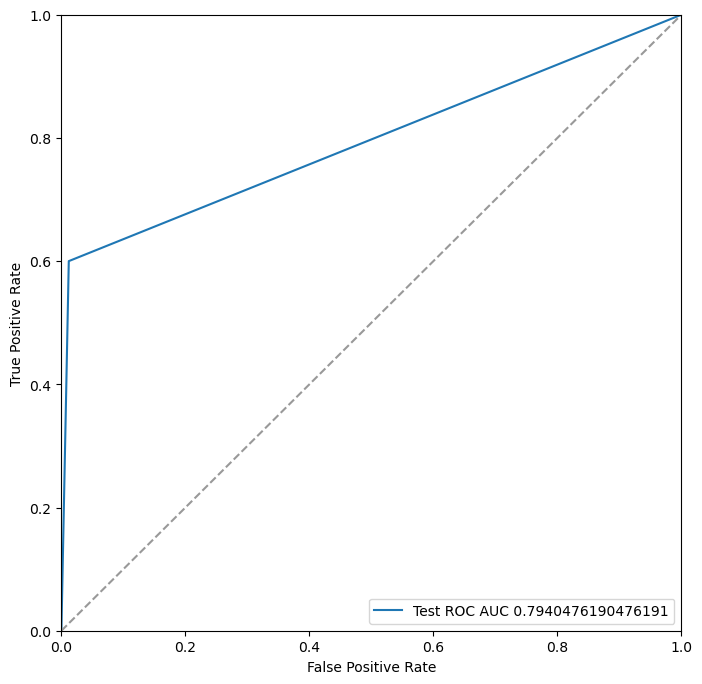

In [187]:
roc_auc_pic(y_knn_predict, y_test)

In [188]:
from sklearn.model_selection import GridSearchCV

knn_2 = KNeighborsClassifier()
params = {'n_neighbors': range(1, 17), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn_2, params, scoring="roc_auc", cv=7)
grid_knn.fit(X_train_norm, y_train)

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 17),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [189]:
grid_knn.best_score_

0.9045918367346939

In [190]:
grid_knn.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [191]:
from sklearn.metrics import classification_report

In [192]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train_norm, y_train)

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


DecisionTreeClassifier()

In [193]:
y_tree_predict = tree.predict(X_test_norm)
print(roc_auc_score(y_test, y_tree_predict))

0.9214285714285714


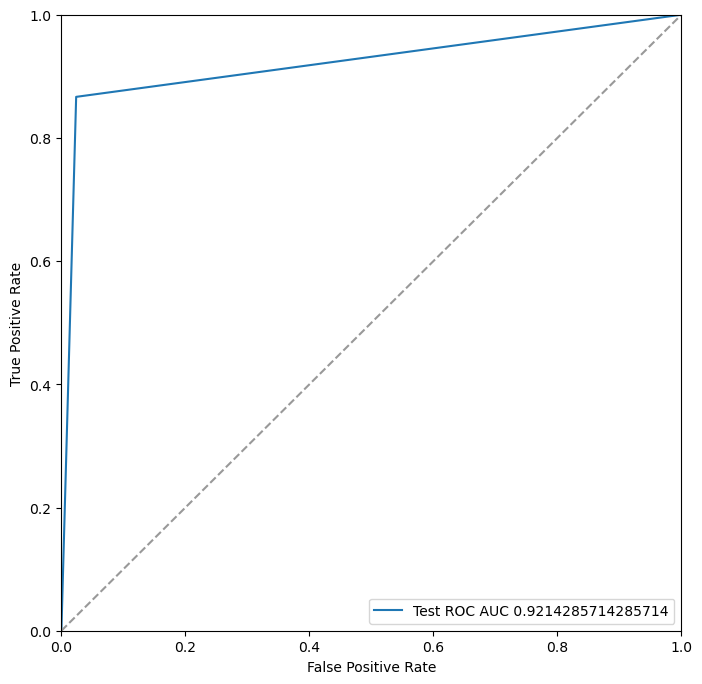

In [194]:
roc_auc_pic(y_tree_predict, y_test)

In [195]:
print(classification_report(y_test, y_tree_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        84
         1.0       0.87      0.87      0.87        15

    accuracy                           0.96        99
   macro avg       0.92      0.92      0.92        99
weighted avg       0.96      0.96      0.96        99



In [196]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 8)
classifier.fit(X_train, y_train)

/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

RandomForestClassifier(n_estimators=8)

In [197]:
from sklearn.metrics import classification_report

In [198]:
rfc_pred = classifier.predict(X_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        84
         1.0       1.00      0.33      0.50        15

    accuracy                           0.90        99
   macro avg       0.95      0.67      0.72        99
weighted avg       0.91      0.90      0.88        99



/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/macbook/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [199]:
print(roc_auc_score(y_test, rfc_pred))

0.6666666666666666


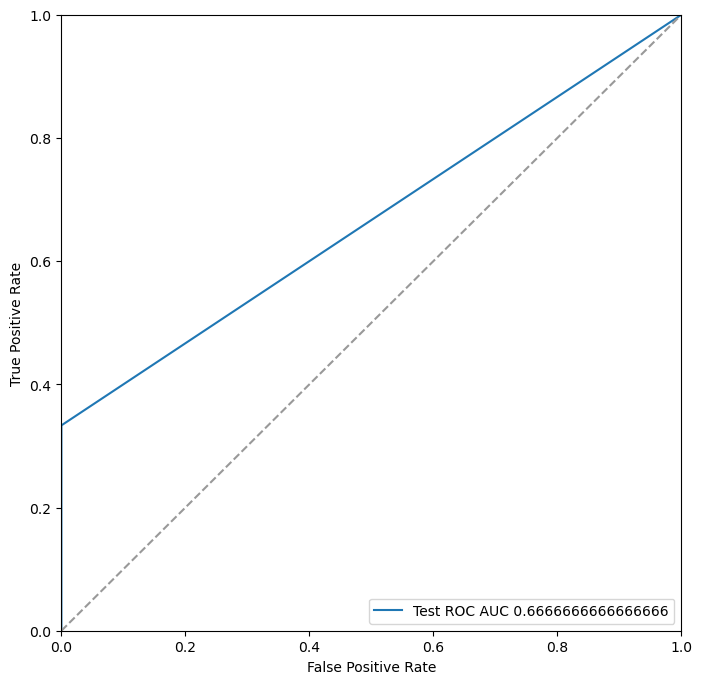

In [200]:
roc_auc_pic(rfc_pred, y_test)